In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
cwest = pd.read_csv(r'./central_west.csv')
col_desc = pd.read_csv(r'./columns_description.csv')

In [3]:
cwest.drop(columns=['index'], inplace=True)

In [4]:
mapping = pd.Series(col_desc['abbreviation'].values, index=cwest.columns).to_dict()
cwest.rename(columns=mapping, inplace=True)

In [5]:
cwest['DATE'] = pd.to_datetime(cwest['date'], format='%Y-%m-%d')
cwest['TIME'] = pd.to_datetime(cwest['hr'], format='%H:%M')

cwest.drop(columns=['date', 'hr'], inplace=True)

cwest['DAY'] = cwest['DATE'].dt.day
cwest['MONTH'] = cwest['DATE'].dt.month
cwest['YEAR'] = cwest['DATE'].dt.year
cwest['HOUR'] = cwest['TIME'].dt.hour
cwest['MINUTE'] = cwest['TIME'].dt.minute
cwest['SECOND'] = cwest['TIME'].dt.second

cwest.drop(columns=['DATE','TIME'], inplace=True)

cwest['mdct'] = pd.to_datetime(cwest[['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND']])

cwest.drop(columns=['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND'], inplace=True)

cwest.sort_values(by='mdct', inplace=True)
cwest.reset_index(drop=True, inplace=True)

In [6]:
cwest.drop(columns=['reg','prov','wsnm','inme'], inplace=True)

In [7]:
cwest.replace([-9999,-99990],np.nan, inplace=True)
for col in cwest.columns:
    cwest[col].fillna(value=cwest[col].mean(), inplace=True)

In [8]:
date_time = cwest.pop('mdct')

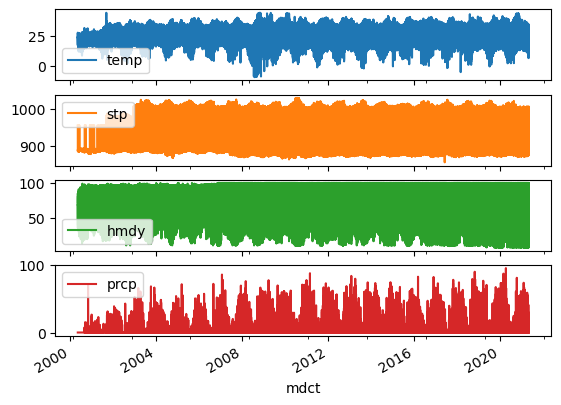

In [9]:
plot_cols = ['temp', 'stp', 'hmdy', 'prcp']
plot_features = cwest[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots = True)

In [10]:
cwest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prcp,11427120.0,0.158577,1.245591,0.000000,0.000000,0.000000,0.000000,96.000000
stp,11427120.0,955.234422,26.773804,855.700000,939.400000,955.300000,974.100000,1028.800000
smax,11427120.0,955.492826,26.854958,830.000000,939.700000,955.500000,974.400000,1030.600000
smin,11427120.0,954.898595,26.808859,830.000000,939.100000,954.900000,973.800000,1028.100000
gbrd,11427120.0,1549.616466,1562.375343,0.000000,1428.000000,1549.616466,1549.616466,48898.000000
temp,11427120.0,24.192790,4.682143,-9.800000,21.500000,24.192790,26.900000,45.000000
dewp,11427120.0,17.171400,4.479927,-10.000000,15.200000,17.300000,20.500000,44.800000
tmax,11427120.0,24.913867,4.807267,-9.700000,22.000000,24.913867,27.800000,45.000000
tmin,11427120.0,23.495292,4.537209,-9.700000,21.000000,23.495292,26.000000,45.000000
dmax,11427120.0,17.749739,4.433491,-10.000000,15.800000,17.900000,21.000000,44.900000


Text(0, 0.5, 'Wind Velocity [m/s]')

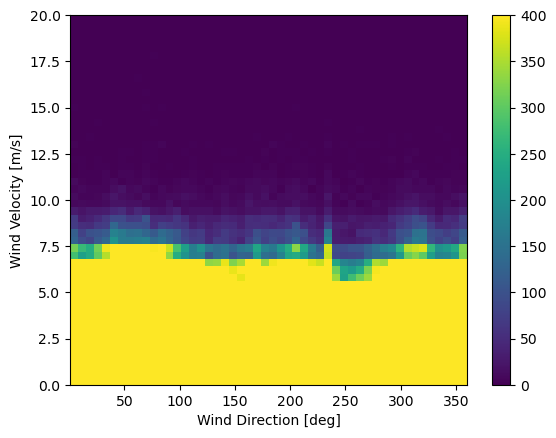

In [11]:
plt.hist2d(cwest['wdct'], cwest['wdsp'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [12]:
ws = cwest.pop('wdsp')
wg = cwest.pop('gust')

wd_rad = cwest.pop('wdct') * np.pi / 180

cwest['Wx'] = ws * np.cos(wd_rad)
cwest['Wy'] = ws * np.sin(wd_rad)

cwest['Gx'] = wg * np.cos(wd_rad)
cwest['Gy'] = wg * np.sin(wd_rad)

(-15.086144492357178,
 19.126938203361515,
 -18.398655064313058,
 19.753766811902754)

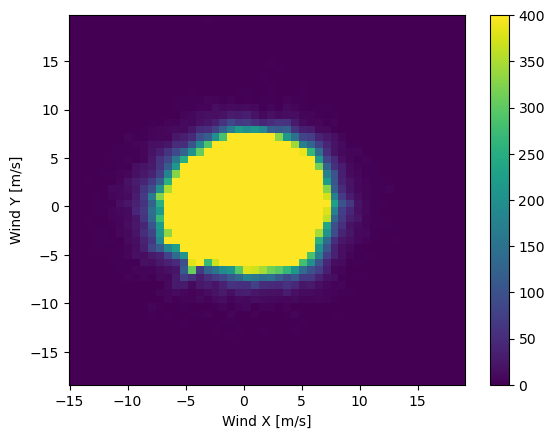

In [13]:
plt.hist2d(cwest['Wx'], cwest['Wy'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [14]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

cwest['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
cwest['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
cwest['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
cwest['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

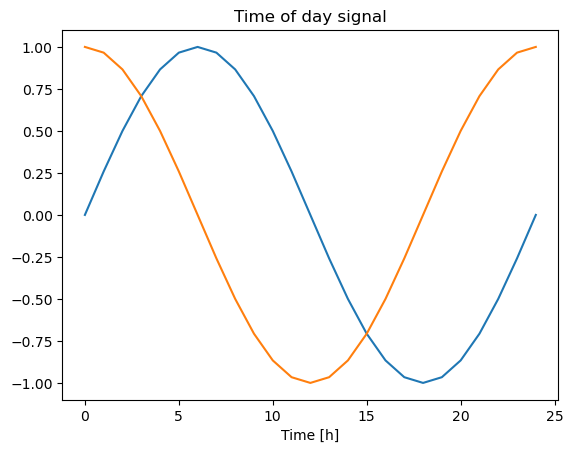

In [15]:
plt.plot(np.array(cwest['Day sin'])[:25])
plt.plot(np.array(cwest['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

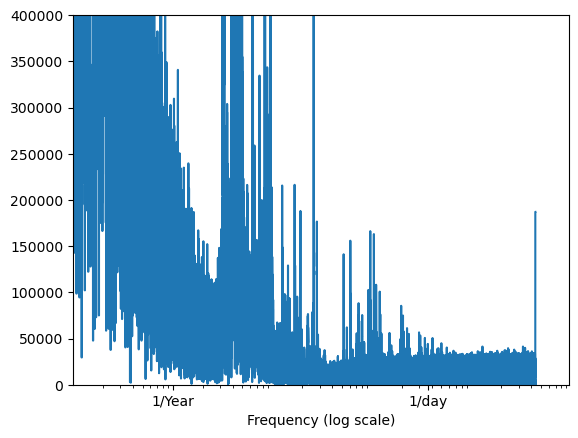

In [26]:
fft = tf.signal.rfft(cwest['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(cwest['temp'])
hours_per_year = 24*365.2425
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [27]:
cwest = (cwest - cwest.min()) / (cwest.max() - cwest.min())

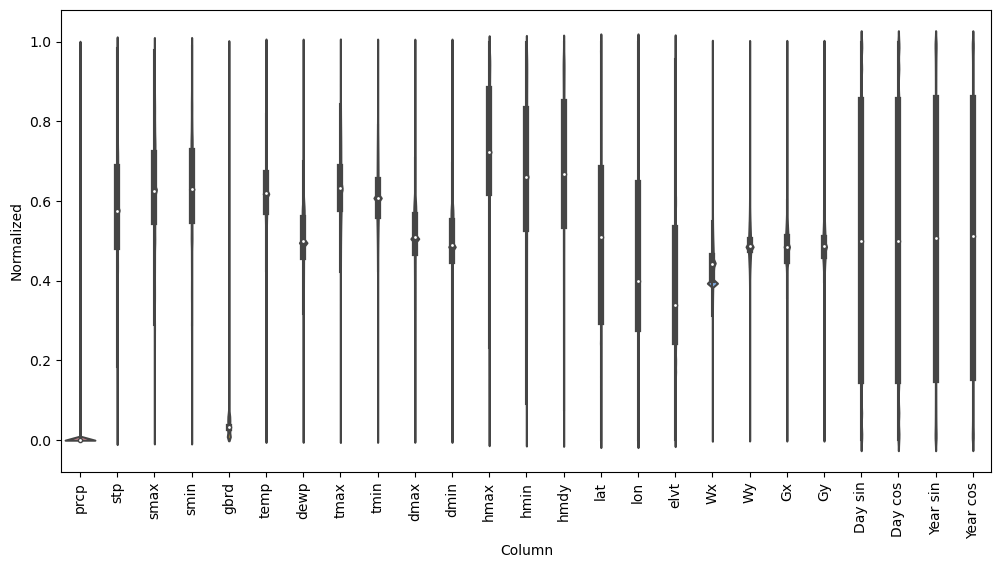

In [32]:
df_norm = cwest.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_norm)
_ = ax.set_xticklabels(cwest.keys(), rotation=90)

In [35]:
cwest.to_csv('brazil_weather.csv', index=True)

In [43]:
OUT = 'brazil_weather'
print(OUT+'.csv')

brazil_weather.csv
